In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings

# Filter out import warnings
warnings.filterwarnings("ignore", category=ImportWarning)

/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_38634/1532750173.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [13]:
df = pd.read_csv('data/updated_data.csv')
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,-1.0,124,636.0,324,323,448,48,34.0,0.0,29.86,9,17,14
1,11,1,5,-7.0,371,2475.0,340,333,531,48,34.0,0.0,29.86,9,17,15
2,11,1,5,-3.0,181,1069.0,301,341,482,48,34.0,0.0,29.86,9,17,22
3,11,1,5,-2.0,168,944.0,345,343,513,48,34.0,0.0,29.86,9,17,12
4,11,1,5,-4.0,139,760.0,360,356,499,46,32.0,0.0,29.91,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,2.0,57,150.0,1370,1372,1427,39,38.0,0.0,30.18,20,32,19
28816,1,31,5,2.0,75,187.0,1390,1392,25,39,38.0,0.0,30.18,19,23,22
28817,1,31,5,-3.0,392,2422.0,1125,1408,1337,39,38.0,0.0,30.18,19,23,21
28818,1,31,5,5.0,224,1598.0,1417,1422,261,39,38.0,0.0,30.18,19,23,13


In [14]:
data = df.reindex(columns=['DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew_Point', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr', 'TAXI_OUT'])
data

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,-1.0,124,636.0,324,323,448,48,34.0,0.0,29.86,9,17,14
1,-7.0,371,2475.0,340,333,531,48,34.0,0.0,29.86,9,17,15
2,-3.0,181,1069.0,301,341,482,48,34.0,0.0,29.86,9,17,22
3,-2.0,168,944.0,345,343,513,48,34.0,0.0,29.86,9,17,12
4,-4.0,139,760.0,360,356,499,46,32.0,0.0,29.91,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2.0,57,150.0,1370,1372,1427,39,38.0,0.0,30.18,20,32,19
28816,2.0,75,187.0,1390,1392,25,39,38.0,0.0,30.18,19,23,22
28817,-3.0,392,2422.0,1125,1408,1337,39,38.0,0.0,30.18,19,23,21
28818,5.0,224,1598.0,1417,1422,261,39,38.0,0.0,30.18,19,23,13


In [15]:
data_to_use = data.iloc[:,0:12]
data_to_use

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew_Point,Wind Gust,Pressure,sch_dep,sch_arr
0,-1.0,124,636.0,324,323,448,48,34.0,0.0,29.86,9,17
1,-7.0,371,2475.0,340,333,531,48,34.0,0.0,29.86,9,17
2,-3.0,181,1069.0,301,341,482,48,34.0,0.0,29.86,9,17
3,-2.0,168,944.0,345,343,513,48,34.0,0.0,29.86,9,17
4,-4.0,139,760.0,360,356,499,46,32.0,0.0,29.91,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2.0,57,150.0,1370,1372,1427,39,38.0,0.0,30.18,20,32
28816,2.0,75,187.0,1390,1392,25,39,38.0,0.0,30.18,19,23
28817,-3.0,392,2422.0,1125,1408,1337,39,38.0,0.0,30.18,19,23
28818,5.0,224,1598.0,1417,1422,261,39,38.0,0.0,30.18,19,23


In [16]:
data_to_target = data.iloc[:,12]
data_to_target

0        14
1        15
2        22
3        12
4        13
         ..
28815    19
28816    22
28817    21
28818    13
28819    15
Name: TAXI_OUT, Length: 28820, dtype: int64

In [19]:
# Standardize selected columns
scaler = StandardScaler()
columns_to_standardize = ['Temperature', 'Wind Gust', 'Pressure', 'DISTANCE']
data_to_use[columns_to_standardize] = scaler.fit_transform(data_to_use[columns_to_standardize])

In [20]:
data_to_use[columns_to_standardize]

,Temperature,Wind Gust,Pressure,DISTANCE
0,0.809381,0.0,-0.784835,-0.717126
1,0.809381,0.0,-0.784835,1.417702
2,0.809381,0.0,-0.784835,-0.214472
3,0.809381,0.0,-0.784835,-0.359580
4,0.560729,0.0,-0.616005,-0.573179
...,...,...,...,...
28815,-0.309550,0.0,0.295679,-1.281305
28816,-0.309550,0.0,0.295679,-1.238353
28817,-0.309550,0.0,0.295679,1.356176
28818,-0.309550,0.0,0.295679,0.399625


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_to_use, data_to_target, test_size=20, random_state=32)


In [24]:
## linear regression model...Training
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = LR.predict(X_test)
y_pred

array([22.49456127, 20.78971837, 21.77938015, 23.71798238, 18.98107836,
       18.68890714, 22.31021466, 18.91358444, 17.98403913, 23.10722012,
       21.08706594, 22.90126663, 20.4283232 , 21.17231128, 20.99946567,
       20.09577869, 22.00559915, 21.87416833, 20.61668345, 23.0615322 ])

In [26]:
result = {'Actual_taxi_out': y_test, 'Predicted_taxi_out': y_pred}
result_df = pd.DataFrame(result)
result_df

,Actual_taxi_out,Predicted_taxi_out
9362,23,22.494561
23840,14,20.789718
24617,22,21.779380
24899,19,23.717982
2007,20,18.981078
8034,16,18.688907
7222,21,22.310215
17910,16,18.913584
911,16,17.984039
10602,19,23.107220


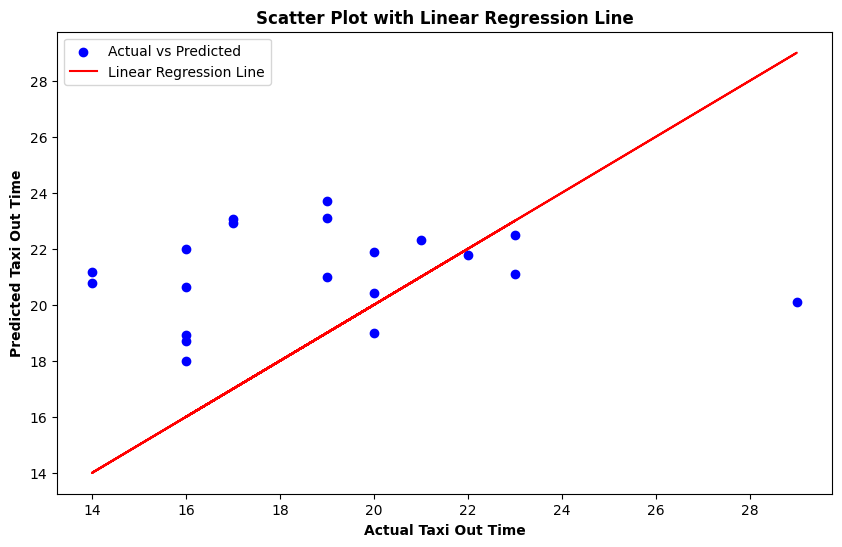

In [30]:
# Scatter plot with linear regression line
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(result_df['Actual_taxi_out'], result_df['Predicted_taxi_out'], color='blue', label='Actual vs Predicted')

# Linear regression line
plt.plot(result_df['Actual_taxi_out'], result_df['Actual_taxi_out'], color='red', label='Linear Regression Line')

plt.xlabel('Actual Taxi Out Time', fontweight='bold')
plt.ylabel('Predicted Taxi Out Time', fontweight='bold')
plt.title('Scatter Plot with Linear Regression Line', fontweight='bold')
plt.legend()
plt.show()



each blue represents the actual vs predicted values
the linear regression line is the actual values 
this shows how well the linear regression model fits the data 
high variants as most of the predicted values are far away from the linear regression line during the test